## Import all the modules needed

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from math import log10
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.ticker import EngFormatter

## Define the symbols

In [2]:
R = symbols('R', real=True, positive=True)
C1 = symbols('C_1', real=True, positive=True)
L1 = symbols('L_1', real=True, positive=True)
C2 = symbols('C_2', real=True, positive=True)
L2 = symbols('L_2', real=True, positive=True)
D = symbols('D', real=True, positive=True)
s = symbols('s', complex=True)
Ts = symbols('T_s', real=True, positive=True)
Vc2 = symbols('V_c2', real=True)
Vc1 = symbols('V_c1', real=True)
Vg = symbols('V_g', real= True)
iL1 = symbols('i_L1', real= True)
iL2 = symbols('i_L2', real= True)


## Write in the matrix A from the hand analysis

In [3]:
A = Matrix([[0, D-1, 0, D-1], [1-D, 0, -D, 0],
          [0, -1, 0, (1-2*D)/D], [R*(1-D), 0, R*(1-D), -1]])
A

Matrix([
[        0, D - 1,         0,       D - 1],
[    1 - D,     0,        -D,           0],
[        0,    -1,         0, (1 - 2*D)/D],
[R*(1 - D),     0, R*(1 - D),          -1]])

## Write in the b vector from hand analysis

In [4]:
b = Matrix([-Vg, 0, -Vg, 0])
b

Matrix([
[-V_g],
[   0],
[-V_g],
[   0]])

## solve for x, which is the averages in terms of what we want

In [5]:
x = A**-1*b
x

Matrix([
[-D**2*V_g/(D**3*R - 3*D**2*R + 3*D*R - R) - D**2*V_g/(D**2*R - 2*D*R + R)],
[                          -D*V_g/(D - 1) - V_g*(2*D - 1)/(D**2 - 2*D + 1)],
[                             D*V_g/(D**2*R - 2*D*R + R) + D*V_g/(D*R - R)],
[                                        D*V_g/(D - 1) + V_g/(D - 2 + 1/D)]])

## often we have to get expressions into the form we want:

In [6]:
x = simplify(x)
x

Matrix([
[-D**3*V_g/(R*(D**3 - 3*D**2 + 3*D - 1))],
[   V_g*(-D**2 - D + 1)/(D**2 - 2*D + 1)],
[          D**2*V_g/(R*(D**2 - 2*D + 1))],
[              D**2*V_g/(D**2 - 2*D + 1)]])

## pick out the results and name them

In [7]:
IL1avg = x.row(0)[0,0]
VC1avg = x.row(1)[0,0]
IL2avg = x.row(2)[0,0]
VC2avg = x.row(3)[0,0]

## we can look at the conversion ratio
VC2 is the output cap, and one of the most salient features 
of a converter is how the duty cycle affects the conversion

In [8]:
duty = np.linspace(0.01, .99, 100)
M = lambdify(D, VC2avg/Vg)
M(.5)

1.0

## a really zoomed out plot
We haven't accounted for a dissipative elements, so 
the conversion ratio can be huge with the Duty cycle near 1

Text(0.5, 0, 'Duty Cycle')

Text(0, 0.5, 'Conversion Ratio')

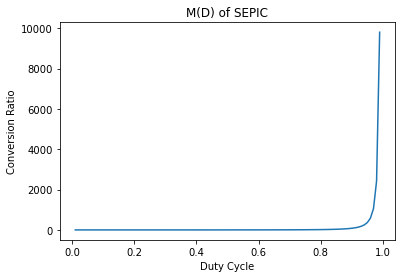

In [9]:
#%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={'title':'M(D) of SEPIC'})
ax.plot(duty, M(duty))
ax.set_xlabel('Duty Cycle')
ax.set_ylabel('Conversion Ratio')



## zoom in to see conversion ratios closer to 1

Text(0.5, 0, 'Duty Cycle')

Text(0, 0.5, 'Conversion Ratio')

(0.0, 1.6)

(0.0, 0.7)

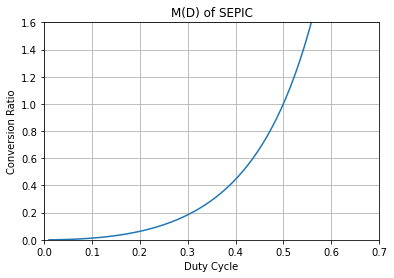

In [10]:
#%matplotlib qt
fig, ax = plt.subplots(subplot_kw={'title':'M(D) of SEPIC'})
ax.plot(duty, M(duty))
ax.set_xlabel('Duty Cycle')
ax.set_ylabel('Conversion Ratio')
ax.set_ylim(top=1.6, bottom =0)
ax.set_xlim(left=0, right=.7)
ax.grid()

## write expression for the ripples
here the component values come into play: L1, L2, C1, C2

In [11]:
DeltaiL1 = (Vg/L1)*(D*Ts)/2
DeltavC1 = (IL1avg*(1-D)*Ts)/(2*C1)
DeltaiL2 = (VC2avg*(1-D)*Ts)/(2*L2)
DeltavC2 = (VC2avg/R)*(D*Ts)/(2*C2)

## some more factoring to get the expressions in a better form

In [12]:
DeltaiL1 
factor(DeltavC1 )
factor(DeltaiL2 )
factor(DeltavC2 )

D*T_s*V_g/(2*L_1)

D**3*T_s*V_g/(2*C_1*R*(D - 1)**2)

-D**2*T_s*V_g/(2*L_2*(D - 1))

D**3*T_s*V_g/(2*C_2*R*(D - 1)**2)

## convert the Sympy expressions to usable functions
this way we can plug in values for the variables, and get a number

In [13]:
DeltaiL1 = lambdify([D, Ts, Vg, R, L1, L2, C1, C2], DeltaiL1)
DeltavC1 = lambdify([D, Ts, Vg, R, L1, L2, C1, C2], DeltavC1)
DeltaiL2 = lambdify([D, Ts, Vg, R, L1, L2, C1, C2], DeltaiL2)
DeltavC2 = lambdify([D, Ts, Vg, R, L1, L2, C1, C2], DeltavC2)

## Remember x is the averages vector
While each component's average doesn't depend on all the inputs, may as well 
compute them all at the same time. The averages function returns a length 4 array 
of the averages, based on the inputs. 

In [14]:

averages = lambdify([D, Ts, Vg, R, L1, L2, C1, C2], x)

inputs = {'D': .5, 'Ts':1e-3, 'Vg':1, 'R':1, 'L1':1e-6, 'L2':'1e-6', 'C1':1e-3, 'C2':1e-3}
list(inputs.values())


[0.5, 0.001, 1, 1, 1e-06, '1e-6', 0.001, 0.001]

## Try out the functions to see if they work
There is some unpacking to do, with the *asterisk*
because its more convenient to keep the inputs all 
together in a data structure like a dictionary, but 
the function returned by lambdify wants them separate


In [15]:
averages(*[ .4, .1e-3, 1, 9, 1e-6, 1e-6, 1e-3, 1e-3])
averages(*list(inputs.values()))
DeltaiL1(*list(inputs.values()))

array([[0.03292181],
       [1.22222222],
       [0.04938272],
       [0.44444444]])

array([[1.],
       [1.],
       [1.],
       [1.]])

250.00000000000003

## Write some helper functions 
The per-cycle waveforms only have 5 relevent time points, for this analysis. 
### The waveform() function takes the inputs, a number for an average, and just adds or subtracts the ripple from the average, and the different time points
Continuous conduction mode only, considered here!

In [16]:
#inputs: D, Ts, Vg, R, L1, L2, C1, C2

def get_time(inputs):
    D = inputs['D']
    Ts = inputs['Ts']
    return np.array([0, D*Ts/2, D*Ts, D*Ts+(1-D)*Ts/2, Ts])

def waveform(inputs, avg, ripple):
    '''
    inputs: a dictionary of keys {D: , Ts:, Vg:, R:, L1:, L2:, C1:, C2:}
    avg: a number representing the average value of the waveform (already computed)
    ripple: a function to compute the ripple, given the inputs. In use this is one 
    of the Delta___ functions returned by the lambdified expressions above. 
    
    
    returns: a 2D array of time and the waveform
    '''
    D = inputs['D']
    Ts = inputs['Ts']
    Vg =  inputs['Vg']
    R =  inputs['R']
    L1 =  inputs['L1']
    L2 = inputs['L2']
    C1 = inputs['C1']
    C2 = inputs['C2']
    
    #av = avg(inputs)
    rip = ripple(*list(inputs.values()))
    #print(rip)
    return np.array([avg-rip, avg, avg+rip, avg, avg-rip])

## Set up the Matplotlib Figure
Use the built in Slider widget, and recalculate everything when a slider value changes
Also, make the plots look nice! 
If you want to understand why the waveforms change the way they do, 
just look at the sympy expressions above!

In [17]:

%matplotlib qt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8,7))
fig.suptitle('SEPIC Converter Waveform Visualizer', fontsize=16)
plt.subplots_adjust(left=.1, bottom=0.3)
t = np.array([0, .25, .5, .75, 1])


ax1.set_ylim(bottom = -1, top=20)
ax2.set_ylim(bottom = -1, top=20)
ax3.set_ylim(bottom = -1, top=20)
ax4.set_ylim(bottom = -1, top=20)
ax1.set_ylabel('L1 current')
ax2.set_ylabel('L2 current')
ax3.set_ylabel('C1 voltage')
ax4.set_ylabel('C2 voltage')
ax1.xaxis.set_major_formatter(EngFormatter(unit='s', places=2, sep=''))
ax2.xaxis.set_major_formatter(EngFormatter(unit='s', places=2, sep=''))
ax3.xaxis.set_major_formatter(EngFormatter(unit='s', places=2, sep=''))
ax4.xaxis.set_major_formatter(EngFormatter(unit='s', places=2, sep=''))

axcolor = 'lightgoldenrodyellow'
L1ax =  plt.axes([0.1, 0.05, 0.3, 0.03], facecolor=axcolor)
L2ax = plt.axes([0.1, 0.1, 0.3, 0.03], facecolor=axcolor)
C1ax = plt.axes([0.1, 0.15, 0.3, 0.03], facecolor=axcolor)
C2ax = plt.axes([0.1, 0.2, 0.3, 0.03], facecolor=axcolor)

Dax = plt.axes([0.6, 0.05, 0.3, 0.03], facecolor=axcolor)
Tsax = plt.axes([0.6, 0.1, 0.3, 0.03], facecolor=axcolor)
Vgax = plt.axes([0.6, 0.15, 0.3, 0.03], facecolor=axcolor)
Rax = plt.axes([0.6, 0.2, 0.3, 0.03], facecolor=axcolor)

L1sld = Slider(L1ax, 'L1 [H]', 1e-6, 100e-6, valinit=20e-6, valstep=.3e-6, valfmt='%1.2e')
C1sld = Slider(C1ax, 'C1 [F]', .001e-3, 1e-3, valinit=1e-3, valfmt='%1.2e')
L2sld = Slider(L2ax, 'L2 [H]',1e-6, 100e-6, valinit=20e-6, valfmt='%1.2e')
C2sld = Slider(C2ax, 'C2 [F]', 0.001e-3, 1e-3, valinit=.1e-3, valfmt='%1.2e')

l1, = ax1.plot(t,t)
l2, = ax2.plot(t,t)
c1, = ax3.plot(t,t)
c2, = ax4.plot(t,t)

def update(val):
    inputs = {'D':Dsld.val, 'Ts':Tssld.val, 'Vg':Vgsld.val, 'R':Rsld.val,
              'L1':L1sld.val, 'L2':L2sld.val, 'C1':C1sld.val, 'C2':C2sld.val}
    averages_arr = averages(*list(inputs.values()) )
    t= get_time(inputs)
    
    l1.set_ydata(waveform(inputs, averages_arr[0][0], DeltaiL1))
    l1.set_xdata(t,)
    ax1.set_ylim(bottom=0, top=max(l1.get_ydata())+1)
    ax1.set_xlim(left = 0 ,right=max(t))
    
    l2.set_ydata(waveform(inputs, averages_arr[2][0], DeltaiL2))
    l2.set_xdata(t)
    ax2.set_ylim(bottom=0, top=max(l2.get_ydata())+1)
    ax2.set_xlim(left = 0 ,right=max(t))
    
    c1.set_ydata(waveform(inputs, averages_arr[1][0], DeltavC1))            
    c1.set_xdata(t)
    ax3.set_ylim(bottom = -2 ,top=max(c1.get_ydata())+3)
    ax3.set_xlim(left = 0 ,right=max(t))

    c2.set_ydata(waveform(inputs, averages_arr[3][0], DeltavC2))
    c2.set_xdata(t)
    ax4.set_ylim(bottom= -2,top=max(c2.get_ydata())+3)
    ax4.set_xlim(left = 0 ,right=max(t))



Dsld = Slider(Dax, 'D', .01, .99, valinit=.5)
Tssld = Slider(Tsax, 'Ts [us]', 1e-6, 10e-6, valinit=2e-6,  valfmt='%1.2e')
Vgsld = Slider(Vgax, 'Vg [V]', 1, 10, valinit=5, valfmt='%1.1f')
Rsld = Slider(Rax, 'R [ohm]', 1, 10, valinit=9, valfmt='%1.1f')

update(0)

L1sld.on_changed(update)
C1sld.on_changed(update)
L2sld.on_changed(update)
C2sld.on_changed(update)
Dsld.on_changed(update)
Rsld.on_changed(update)
Vgsld.on_changed(update)
Tssld.on_changed(update)


def reset(event):

    pass

plt.show()

Text(0.5, 0.98, 'SEPIC Converter Waveform Visualizer')

(-1.0, 20.0)

(-1.0, 20.0)

(-1.0, 20.0)

(-1.0, 20.0)

Text(0, 0.5, 'L1 current')

Text(0, 0.5, 'L2 current')

Text(0, 0.5, 'C1 voltage')

Text(0, 0.5, 'C2 voltage')

0

0

0

0

0

0

0

0